In [6]:
#from QDP import qdp
import os.path
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import datetime
from scipy import optimize
dp = 'D:/FNode-data'

ImportError: cannot import name _Backend

In [5]:
import sys
print sys.path

['', 'c:\\users\\fnode\\appdata\\local\\enthought\\canopy\\user\\scripts\\python27.zip', 'C:\\Users\\FNode\\AppData\\Local\\Enthought\\Canopy\\App\\appdata\\canopy-1.7.4.3348.win-x86_64\\DLLs', 'C:\\Users\\FNode\\AppData\\Local\\Enthought\\Canopy\\App\\appdata\\canopy-1.7.4.3348.win-x86_64\\lib', 'C:\\Users\\FNode\\AppData\\Local\\Enthought\\Canopy\\App\\appdata\\canopy-1.7.4.3348.win-x86_64\\lib\\plat-win', 'C:\\Users\\FNode\\AppData\\Local\\Enthought\\Canopy\\App\\appdata\\canopy-1.7.4.3348.win-x86_64\\lib\\lib-tk', 'C:\\Users\\FNode\\AppData\\Local\\Enthought\\Canopy\\App\\appdata\\canopy-1.7.4.3348.win-x86_64', 'c:\\users\\fnode\\appdata\\local\\enthought\\canopy\\user', 'c:\\users\\fnode\\appdata\\local\\enthought\\canopy\\user\\lib\\site-packages', 'c:\\users\\fnode\\appdata\\local\\enthought\\canopy\\user\\src\\dicttoxml', 'c:\\labsoftware\\origin\\lib', 'c:\\users\\fnode\\appdata\\local\\enthought\\canopy\\user\\lib\\site-packages\\win32', 'c:\\users\\fnode\\appdata\\local\\ent

In [11]:
exp_name = ''
if exp_name:
    exp_date = '_'.join(exp_name.split('_')[:3])
    experiment_file = os.path.join(exp_date, exp_name, 'results.hdf5')
else:
    experiment_file = ''
q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
print "ivars: {}".format(q.experiments[0]['variable_list'])


itrs = len(q.experiments[0]['iterations'].keys())
if 'fig' in locals():
    plt.close(fig)
fig, ax = plt.subplots(ncols=2, nrows=itrs, figsize=(10,10))
shot = 0
fit_params_r0 = []
fit_params_r1= [""]
# param_guess = [
#     [(0.2, 250, 500), (0.2, 0.3, 10)],  # Cs
#     [(0.1, 250, 500), (0.1, 0.3, 7)],  # Rb
# ]
signif = []
max_photons = -1
for itr in range(itrs):
    for r in range(2):
        max_photons = max(max_photons, np.max(q.experiments[0]['iterations'][itr]['signal_data'][:,0,r,0].astype("int")))

species = ['Cs', 'Rb']
#q.generate_thresholds(itr=itr, loss=False)
#retention = q.apply_thresholds(exclude_rois=[2])
for itr in range(itrs):

    #results = q.generate_thresholds(itr=itr, loss=True)
    #fit_params_r0.append(results[0][shot]['fit_params'])
    #fit_params_r1.append(results[1][shot]['fit_params'])
    #itr_cuts = {
    #    0: q.get_thresholds()[0],
    #    1: q.get_thresholds()[1]
    #}
    #print(itr_cuts)
    for r in range(2):
        d0 = q.experiments[0]['iterations'][itr]['signal_data'][:,0,r,0].astype("int")
        d1 = q.experiments[0]['iterations'][itr]['signal_data'][:,1,r,0].astype("int")
        ax[itr][r].hist(d0, bins=np.arange(0,max_photons+1,5), range=(0, 100), density=True, histtype='step')
        #ax[itr][r].axvline(x=np.mean(d0), color='r', linestyle='--')
        ax[itr][r].axvline(x=np.max(d0)+2, color='g', linestyle='--')
        ax[itr][r].axvline(x=80, color='b', linestyle='--')
        print '{} mean: {} std. dev: {}'.format(r,np.mean(d0),np.std(d0))
        


        #ivar_str = ','.join(["{:.3f}".format(q.experiments[0]['iterations'][itr]['variables'][v]) for v in q.experiments[0]['variable_list']])

#         ax[itr][r].set_yscale('log', nonposy='clip')
        #ax[itr][r].set_ylim(0, 0.005)
#         if shot == 0:
        ax[itr][r].set_xlim(0, max_photons+5)
        ax[itr][r].set_ylim(0,0.05)
#             ax[itr][r].set_ylim(0, 0.01)
        
#         else:
#             ax[itr][r].set_xlim(0, 30)
        loading_st = '% Above 100: {:.3f}'.format(len(d0[np.logical_and(d0>550,d0<750)])/float(len(d0)))
        ax[itr][r].set_title(species[r]+' itr: {}: '.format(itr)+loading_st, loc='left')
#         if len(results[r][shot]['fit_params']):
#             xs = np.arange(750)
#             ax[itr][r].plot(xs, results[r][shot]['function'](xs, *(results[r][shot]['fit_params'])))
fig.tight_layout()
fmts = ['pdf', 'png']
fn = os.path.join(dp, q.experiments[0]['source_path'], 's0_signal_vs_iy_mz.{}')
#for fmt in fmts:
    #fig.savefig(fn.format(fmt), dpi=200, format=fmt)


data at: 2020_02_03/2020_02_03_17_45_49_iz/results.hdf5
name 'fort_exp' is not defined
name 'rb_uwave_freq' is not defined
ivars: [u'Iz']


FigureCanvasNbAgg()

0 mean: 340.524752475 std. dev: 44.3580378954
1 mean: 273.099009901 std. dev: 22.0344037703
0 mean: 357.306930693 std. dev: 61.8173199118
1 mean: 274.306930693 std. dev: 23.1699457835
0 mean: 326.96039604 std. dev: 31.1008964221
1 mean: 269.346534653 std. dev: 18.5784052452


In [65]:
testnode=q.experiments[0]['iterations'][0]['signal_data']
print(testnode)

[[[[576]
   [672]
   [  0]]

  [[532]
   [526]
   [  0]]]


 [[[506]
   [503]
   [  0]]

  [[471]
   [492]
   [  0]]]


 [[[626]
   [502]
   [  0]]

  [[617]
   [506]
   [  0]]]


 ...


 [[[488]
   [488]
   [  0]]

  [[481]
   [476]
   [  0]]]


 [[[498]
   [461]
   [  0]]

  [[527]
   [466]
   [  0]]]


 [[[538]
   [487]
   [  0]]

  [[510]
   [484]
   [  0]]]]


In [11]:
min(signif)

ValueError: min() arg is an empty sequence

In [ ]:
chunks = [signif[25*i:25*(i+1)] for i in range(len(signif)/25)]

In [40]:
if 'fig' in locals():
    plt.close(fig)
fig, ax = plt.subplots(ncols=len(chunks), figsize=(15,5))
for i, c in enumerate(chunks):
    ax[i].matshow([c[5*i:5*(i+1)] for i in range(len(c)/5)], vmin=3.5, vmax=max(signif), cmap='jet')

FigureCanvasNbAgg()

In [52]:
fig, ax = plt.subplots(ncols=2, nrows=5)
params = ['p1', 'r_bg', 'r_atom', 'alpha']
data_r0 = np.transpose(np.array(fit_params_r0))
data_r1 = np.transpose(np.array(fit_params_r1))
for param in range(4):
    ax[param][0].plot(np.arange(len(fit_params_r0)), data_r0[param])
    ax[param][1].plot(np.arange(len(fit_params_r1)), data_r1[param])
    ax[param][0].set_ylim(15, 25)
    ax[param][1].set_ylim(15, 25)
    if param == 3:
        ax[param+1][0].plot(np.arange(len(fit_params_r0)), 1-np.exp(-1.0*data_r0[param]*5.5))
        ax[param+1][1].plot(np.arange(len(fit_params_r1)), 1-np.exp(-1.0*data_r1[param]*0.5))
        ax[param+1][0].set_ylim(0, 1.3*np.max(data_r0[param+1]))
        ax[param+1][1].set_ylim(0, 1.3*np.max(data_r1[param+1]))

FigureCanvasNbAgg()

IndexError: index 3 is out of bounds for axis 0 with size 3

In [ ]:
# get s0 cuts
cuts = [[[170],[3]],[[110],[3]]]
for r in range(2):
    q.set_thresholds(cuts[r], roi=r)

retention = q.apply_thresholds(exclude_rois=[2])
itrs = len(q.experiments[0]['iterations'].keys())
s1_cuts = []
loads = []
for itr in range(itrs):
    s1_cuts.append(q.experiments[0]['iterations'][itr]['signal_data'][q.experiments[0]['iterations'][itr]['quantized_data'][:,0,0].astype('bool'),1,0])
    loads.append(float(s1_cuts[-1].shape[0])/500)

In [9]:
for itr in s1_cuts:
    print(np.mean(itr))

8.24902723735
7.69658119658
8.25123152709
8.34090909091
8.03829787234
8.37719298246
7.21478873239
8.08940397351
8.01041666667
8.20689655172
8.32751091703


In [38]:
def exp(x, a, b, c):
    return a*np.exp(-x/b)+c

<IPython.core.display.Javascript object>


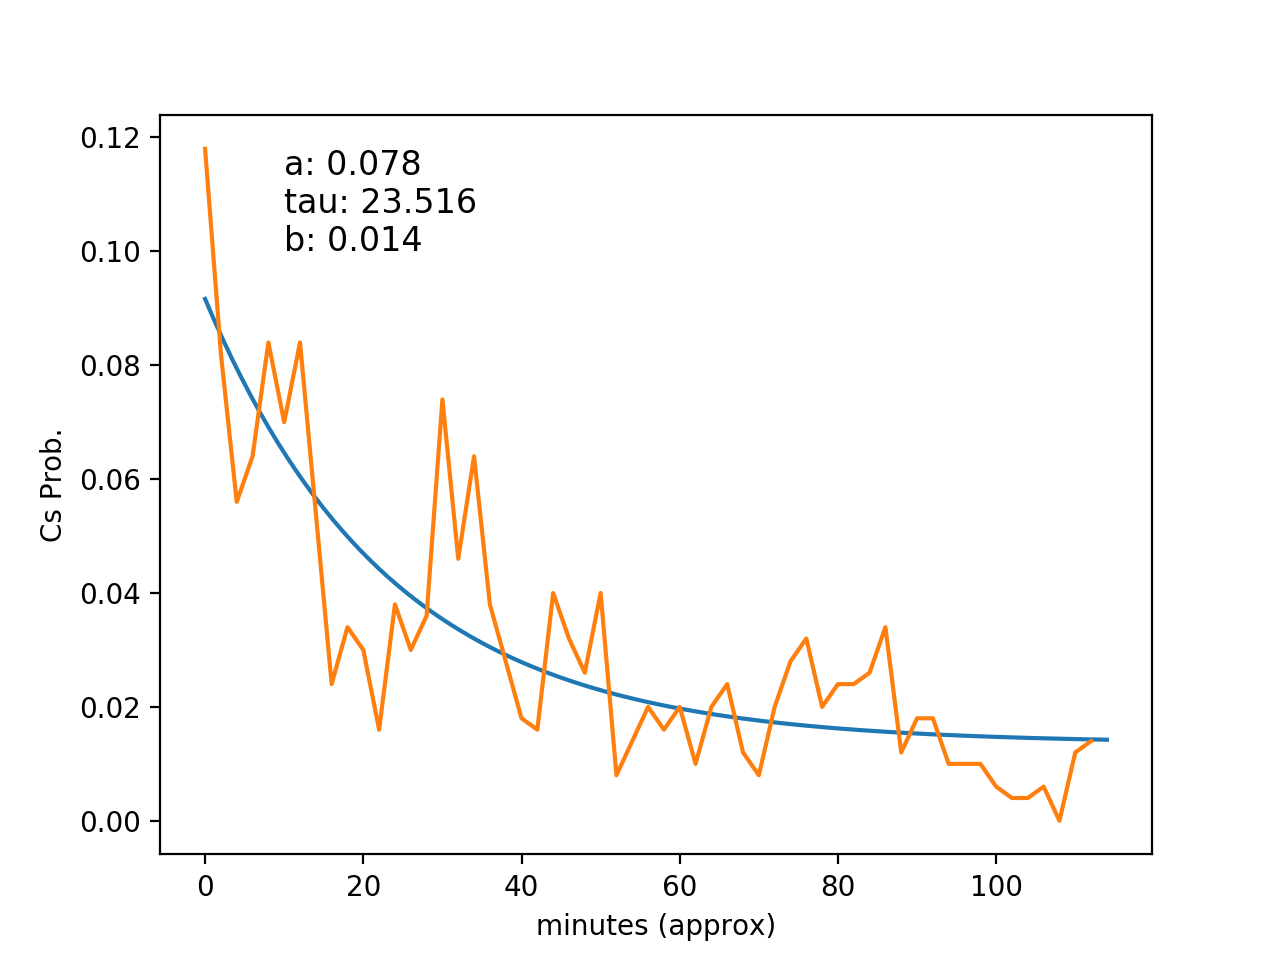

In [46]:
guess = (0.12, 20, 0)
popt, pcov = optimize.curve_fit(
    exp,
    2*np.arange(len(loads)),
    loads,
    p0=guess,
)

fig, ax = plt.subplots()
xs = np.linspace(0,2*len(loads),100)
ax.plot(xs, exp(xs, *popt))
fit_data = "a: {:.3f}\ntau: {:.3f}\nb: {:.3f}"
ax.text(10, 0.1, fit_data.format(*popt), fontsize=12)
ax.set_xlabel("minutes (approx)")
ax.set_ylabel("Cs Prob.")

ax.plot(2*np.arange(len(loads)), loads)

fmts = ['pdf', 'png']
fn = os.path.join(dp, os.path.dirname(experiment_file), 'cs_loading_drop.{}')
for fmt in fmts:
    fig.savefig(fn.format(fmt), dpi=200, format=fmt)

In [23]:
fig, ax = plt.subplots(itrs, figsize=(6,20))
s1_sigs = []
for itr in range(itrs):
    if len(s1_cuts[itr]):
        ax[itr].hist(s1_cuts[itr], bins=np.arange(max(s1_cuts[itr])+1), density=True, histtype='step')
        ax[itr].axvline(x=cuts[roi][1][0], color='k', linestyle='--')
        s1_sigs.append(np.mean(s1_cuts[itr]))
        ax[itr].set_xlim(0,30)
        ax[itr].set_ylim(0,0.2)

fmts = ['pdf', 'png']
fn = os.path.join(dp, os.path.dirname(experiment_file), 's1_readout_det_scan.{}')
for fmt in fmts:
    fig.savefig(fn.format(fmt), dpi=200, format=fmt)


#s1_bg = np.mean(s1_nocut)

FigureCanvasNbAgg()

In [28]:
for itr in s1_cuts:
    np.sum(s1_cuts[0][:,0]>cuts[roi][1][0]).astype('f')/s1_cuts[0].shape[0]

0.91828793774319062

In [21]:
cuts

[[110], [3]]